# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [5]:
 # importint packages
import numpy as np
import itertools as it
from scipy import optimize

# importing pyplot and chossing style.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

We're using scipy optimize to solve the model, the optimize function is written in inauguralproject.py so it doesn't clutter this document.

# Question 1

In [6]:
# code for solving the model (remember documentation and comments)
#setting parameter values

m = 1
v = 10
epsilon = 0.3
tao0 = 0.4
tao1 = 0.1
kappa = 0.4
w = 1
cl = (1,1)
x = (0,0,0)

#Defining model
def f(c = cl[0], l = cl[1], v = v, epsilon = epsilon):
    return np.log(c) - v*(l**(1+1/epsilon))/(1+1/epsilon)

In [7]:
# Using scipy to optimize the model
sol = inauguralproject.solver(m,v,epsilon,tao0,tao1,kappa,w,cl,f)
# d. unpack solution
c = sol.x[0]
l = sol.x[1]
u = f(c,l)
inauguralproject.print_solution(c,l,u)

c = 1.23999669
l = 0.39999449
u = 0.17158306


# Question 2

Text(0, 0.5, '$c^*$')

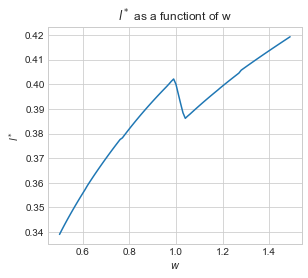

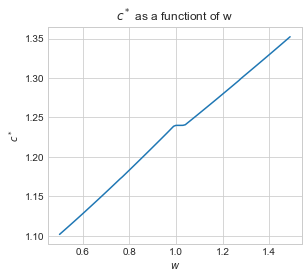

In [11]:
# Run the code for a range of w

# create list for w, c, and l
wliste = np.arange(0.5, 1.5, 0.01).tolist()
cliste = []
lliste = []

# fill lists with values
for w in wliste:
    sol = inauguralproject.solver(m,v,epsilon,tao0,tao1,kappa,w,cl,f)
    c = sol.x[0]
    l = sol.x[1]
    cliste.append(c)
    lliste.append(l)

# create figure 1 for l*
fig1 = plt.figure(figsize=(10,4))# figsize is in inches...
ax = fig1.add_subplot(1,2,1)
ax.plot(wliste,lliste) # create surface plot in the axis
ax.set_title("$l^*$ as a functiont of w")
ax.set_xlabel('$w$')
ax.set_ylabel('$l^*$')

# create figure 2 for c*
fig2 = plt.figure(figsize=(10,4))# figsize is in inches...
ax = fig2.add_subplot(1,2,1)
ax.plot(wliste,cliste) # create surface plot in the axis
ax.set_title("$c^*$ as a functiont of w")
ax.set_xlabel('$w$')
ax.set_ylabel('$c^*$')

From the figures above we see that $l^*$ and $c^*$ is increasing with $w$ untill around 1.24 where $l^*$ drops sharply, and $c^*$ stays at the same value.
For the rest of $w$ $c^*$ and $l^*$ are increasing again.

# Question 3

First we define 10.000 wages with a uniform distribution.
Then the total tax revenue is calculated by looping over the tax paid by each person and adding them up.  
This is all done in the module inauguralproject.py

In [53]:
#using defined function for total tax revenue (TTR) to calculate TTR for epsilon = 0.3

TTR = inauguralproject.totaltax(tao0, tao1, kappa, m, v, epsilon, w, cl, f)

#printing result
print(f'Total tax revenue for epsilon = 0.3 is:')
print(f"T = {TTR:.3f}")

Total tax revenue for epsilon = 0.3 is:
T = 1621.642


# Question 4

Same as 3, except we define a new epsilon.

In [54]:
#setting epsilon = 0.1 and defining model again
epsilon = 0.1
def f(c = cl[0], l = cl[1], v = v, epsilon = epsilon):
    return np.log(c) - v*(l**(1+1/epsilon))/(1+1/epsilon)

#calculating total tax ravenue for new epsilon
TTR = inauguralproject.totaltax(tao0, tao1, kappa, m, v, epsilon, w, cl, f)

#printing result
print(f'Total tax revenue for epsilon = 0.1 is:')
print(f"T = {TTR:.3f}")

Total tax revenue for epsilon = 0.1 is:
T = 3180.862


# Question 5

We were having some trouple with this question, as we were unsure about how to optimize T when tao0, tao1, and kappa are used to determine c* and l*, but we've used those to find the optimal tao0, tao1, and kappa.
Our function will always use maximum tao0 and min tao1 as there are no restrictions.

In [78]:
# finding optimal tao0, tao1, and kappa by using solvetax
#setting epsilon = 0.1 and defining model again
epsilon = 0.3
def f(c = cl[0], l = cl[1], v = v, epsilon = epsilon):
    return np.log(c) - v*(l**(1+1/epsilon))/(1+1/epsilon)

optimaltax = inauguralproject.solvetax(x, c, l, w, m, v, epsilon, cl, f, tao0, tao1)

In [65]:
#unpacking solution
tao0 = optimaltax.x[0]
tao1 = optimaltax.x[1]
kappa = optimaltax.x[2]
TTR = inauguralproject.totaltax(tao0, tao1, kappa, m, v, epsilon, w, cl, f)
inauguralproject.print_solution2(tao0,tao1,kappa,TTR)

tao0 = 1.00000000
tao1 = 0.10087865
kappa = 2800.94885938
Total tax revenue = 2373.73583160


# Conclusion

In question 1 we found the optimal l and c to be $l^* = 0.39999449$ and $ c^* = 1.23999669$ for a total utility of $u = 0.17158306$

In question 3 and 4 we looked at what would happen if $\epsilon$ change from 0.3 to 0.1.
We found that Total tax revenue for $\epsilon = 0.3$ is $T = 1621.642$ and $T = 3180.862$ for $\epsilon = 0.1$.
We can therefor conclude that the total tax revenue will increase when the elasticity of labor supply decreases.